In [2]:

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.api as sm
from sklearn.covariance import MinCovDet
from statsmodels.graphics.tsaplots import plot_acf
from scipy.stats import t, f, chi2
%matplotlib inline

  Using cached sklearn-0.0.tar.gz (1.1 kB)
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=770e40910634dacb77370875107c18d26bfba0df18baa6d8fc7e146b8e25df64
  Stored in directory: c:\users\mcnelis\appdata\local\pip\cache\wheels\e4\7b\98\b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn


ModuleNotFoundError: No module named 'pandas'

$\textbf{Empirical Exercise-Week 8}$  Exchange rate dynamics: Comparing Euro and Sterling. File: sterling.csv. Text: p. 610, 13.12

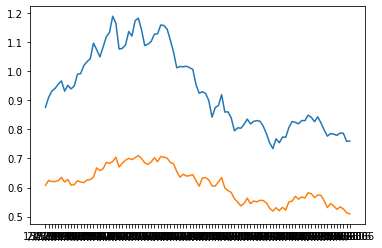

In [10]:
Tab1 = pd.read_csv('sterling.csv')
date11 = Tab1.iloc[:,0]
date1 = np.array(Tab1.iloc[:,0]); euro = np.array(Tab1.iloc[:,1])
sterling = np.array(Tab1.iloc[:,2])
plt.plot(date11, np.array([euro, sterling]).T)

In [3]:
leuro = np.log(euro);  lsterling = np.log(sterling);
x = leuro; y = sterling;
xx = np.array([np.ones(len(y)), leuro]).T
results1 = sm.OLS(y,xx).fit()
[results1.params, results1.tvalues]

[array([0.64138905, 0.40777258]), array([403.13127191,  41.04694578])]

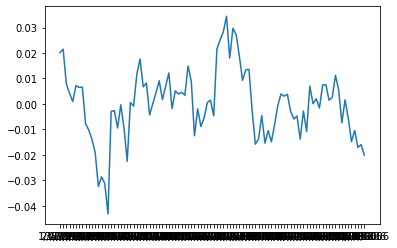

In [43]:
cvec = results1.resid
plt.plot(date1, cvec)  # plot coitegrating vector

In [4]:
from statsmodels.tsa.vector_ar.vecm import VECM

In [5]:
yy = np.array([leuro, lsterling]).T
results1=VECM(yy,coint_rank=1,k_ar_diff=4,deterministic='co').fit()
results1.alpha.dot(results1.beta.T)

array([[ 0.20421968, -0.2957218 ],
       [ 0.26607592, -0.38529319]])

In [6]:
results1.summary()

,coef,std err,z,P>|z|,[0.025,0.975]
const,-0.1345,0.070,-1.934,0.053,-0.271,0.002
L1.y1,0.1903,0.164,1.162,0.245,-0.131,0.511
L1.y2,-0.3347,0.203,-1.648,0.099,-0.733,0.063
L2.y1,0.0366,0.164,0.223,0.824,-0.285,0.358
L2.y2,0.0433,0.204,0.212,0.832,-0.357,0.444
L3.y1,-0.2869,0.160,-1.795,0.073,-0.600,0.026
L3.y2,0.3199,0.200,1.601,0.109,-0.072,0.712
L4.y1,-0.3323,0.161,-2.064,0.039,-0.648,-0.017
L4.y2,0.3629,0.190,1.911,0.056,-0.009,0.735
,coef,std err,z,P>|z|,[0.025,0.975]
